In [118]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import adjusted_rand_score
import nltk

In [94]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Long\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
# docs and terms from files, complete
dir = "small_teddy.txt"
text_file = open(dir, "r")
txt = text_file.read()
text_file.close()


sentences = nltk.sent_tokenize(txt)
sentences = [sentence.lower() for sentence in sentences]


terms = open('small_teddy_terms.txt', 'r').read().split('\n')
terms = [term.lower() for term in terms]


vocab = {term: idx for idx, term in enumerate(terms)}

vectorizer = TfidfVectorizer(vocabulary = terms, ngram_range=(2, 5))
X = vectorizer.fit_transform(sentences)
X.toarray()



array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.60529218, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.38548837,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [96]:
sentences

['theodore roosevelt jr., often referred to as teddy or by his initials, t. r., was an american politician, statesman, soldier, conservationist, naturalist, historian, and writer who served as the 26th president of the united states from 1901 to 1909.',
 'he previously served as the 25th vice president under president william mckinley from march to september 1901 and as the 33rd governor of new york from 1899 to 1900.',
 "assuming the presidency after mckinley's assassination, roosevelt emerged as a leader of the republican party and became a driving force for anti-trust and progressive policies.",
 'a sickly child with debilitating asthma, he overcame his health problems as he grew by embracing a strenuous lifestyle.',
 'roosevelt integrated his exuberant personality and a vast range of interests and achievements into a "cowboy" persona defined by robust masculinity.',
 'he was home-schooled and began a lifelong naturalist avocation before attending harvard college.',
 'his book the n

In [ ]:
arr = X.toarray().T

In [117]:
arr[6]

array([0.43214693, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.57096415, 0.62804707, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Phân cụm bằng DBSCAN

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

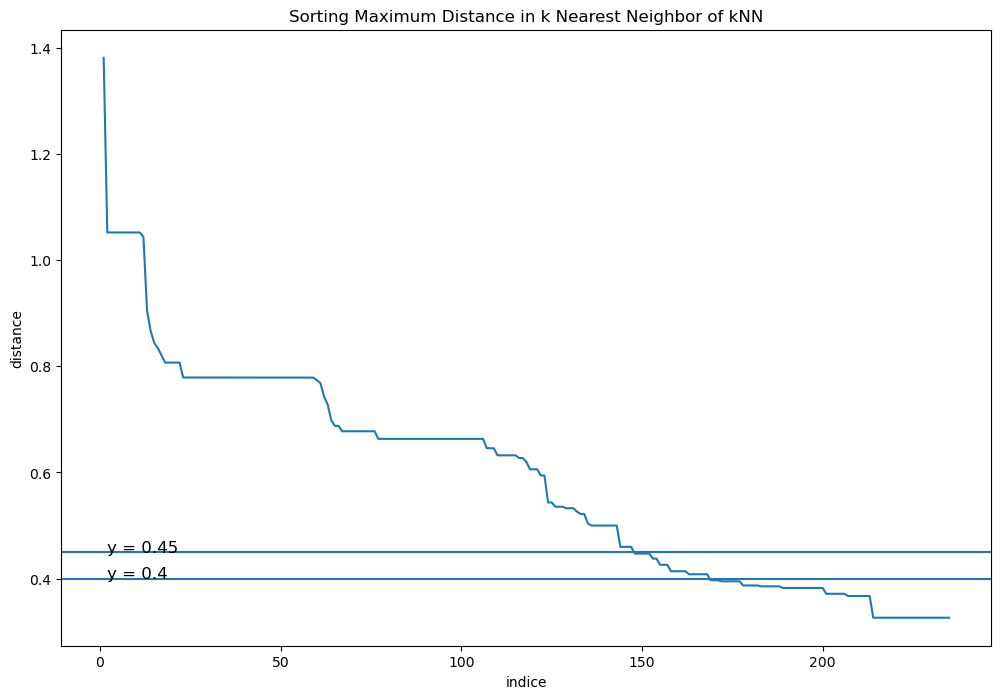

In [163]:
from sklearn.neighbors import NearestNeighbors


# Xây dựng mô hình k-Means với k=10
neighbors = 20
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(arr)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(arr)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.4)
plt.text(2, 0.4, 'y = 0.4', fontsize=12)
plt.axhline(y=0.45)
plt.text(2, 0.45, 'y = 0.45', fontsize=12)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

In [110]:
from matplotlib.gridspec import GridSpec
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

def _plot_kmean_scatter(X, labels, gs, thres):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    ax = plt.subplot(gs)
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(int)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        indices = (labels == i)
        xtext, ytext = np.median(X[indices, :], axis=0)
        if not (np.isnan(xtext) or np.isnan(ytext)):        
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])
            txts.append(txt)
    plt.title('t-sne visualization for thres={:.4f}'.format(thres))

In [101]:
gs = GridSpec(3, 4)
plt.figure(figsize = (25, 18))
plt.subplots_adjust(wspace=0.1,hspace=0.4)

<Figure size 2500x1800 with 0 Axes>

In [174]:
for thres in np.linspace(0.3, 0.4, 20):
    dbscan = DBSCAN(eps=thres, min_samples=5, metric='euclidean')
    labels = dbscan.fit_predict(arr)
    unique_list = sorted(list(set(labels)))

    print(f'Epsilon: {thres}')
    for unique in unique_list:
        print(f' Cluster: {unique}')
        for index, value in enumerate(labels):
            if (value == unique):
                print(f'  {terms[index]}')
    
    print('='*200, '\n')


Epsilon: 0.3
 Cluster: -1
  sudden nighttime asthma attacks
  presidency after mckinley
  robust masculinity
  theodore roosevelt
  governor of new york
  united states
  father of anna eleanor roosevelt
  spanish army
  natural resources
  young theodore
  regulation of railroads
  harvard college
  unorthodox career choice
  president franklin delano roosevelt
  landslide victory
  home in new york city
  funeral procession
  makeshift museum
  ally william howard taft
  family in prayers
  enough wealth
  photographic memory
  american naval power
  bad trusts
  vast range
  father of president franklin delano
  children selfishness
  full term
  reform faction of republicans
  accomplished naturalist
  significant benefits
  nobel prize
  schuyler family
  square deal
  american history
  tours of europe
  progressive movement
  democratic nominee woodrow wilson
  platform of victory
  law student
  cattle ranch
  great white fleet
  brother elliott
  cosmopolitan perspective
  con

# Phân cụm bằng HClust

In [176]:
for n_cluster in range(5, 15):
    HClust_model = AgglomerativeClustering(distance_threshold=None, n_clusters=n_cluster, metric='euclidean')
    
    labels = HClust_model.fit_predict(arr)
    unique_list = sorted(list(set(labels)))

    print(f'Number of Cluster: {n_cluster}')
    for unique in unique_list:
        print(f' Cluster: {unique}')
        for index, value in enumerate(labels):
            if (value == unique):
                print(f'  {terms[index]}')
    
    print('='*200, '\n')

Number of Cluster: 5
 Cluster: 0
  alpha delta phi literary society
  sudden nighttime asthma attacks
  presidency after mckinley
  street headquarters of new york
  president william mckinley
  robust masculinity
  alpha delta phi
  united states
  spanish army
  harvard advocate
  natural resources
  minister at christ church
  young theodore
  fifth son
  6-year-old theodore
  meetings at morton hall
  regulation of railroads
  mission class
  unorthodox career choice
  landslide victory
  home in new york city
  funeral procession
  martha p.
  makeshift museum
  procession of abraham lincoln
  ally william howard taft
  family in prayers
  political machine
  photographic memory
  american naval power
  bad trusts
  vast range
  interest in zoology
  children selfishness
  full term
  local market
  reform faction of republicans
  accomplished naturalist
  significant benefits
  33rd governor
  nobel prize
  schuyler family
  leader in new york
  vice president
  square deal
  une

# Phân cụm bằng Kmeans

In [ ]:
true_k = 100
Kmeans_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
Kmeans_model.fit(arr)

print("Top terms per cluster:")
order_centroids = Kmeans_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :]:
        print(' %s' % terms[ind]),
    print
# Xem cách nó print ra các cluster và tên các phần tử trong cluster

# Test Wordnet và Word2vec

In [14]:
import gensim

In [15]:
word_limit = 100000
pretrained_model_dir = "GoogleNews-vectors-negative300.bin"
# Load the Word2Vec model
model = gensim.models.KeyedVectors.load_word2vec_format(pretrained_model_dir, binary=True, limit=word_limit)

In [16]:
model.most_similar('dog')

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428980827332),
 ('pit_bull', 0.7803961038589478),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609456777572632),
 ('golden_retriever', 0.7500901818275452),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418621182441711),
 ('pup', 0.740691065788269)]

In [15]:
# Find the analogy between the pairs of words "king" and "man" and "queen" and "woman"
analogy = model.most_similar(positive=['king', 'woman'], negative=['man'])

# Print the analogy
print(f"{analogy[0][0]}: {analogy[0][1]}")

queen: 0.7118193507194519
